# Gene regulatory network 

## Deterministic model with 7 stages


In [1]:
# import libraries
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns


In [2]:
# set parameters

# time span
t = np.linspace(0,1000, num=1000)

# initial state
y0 = [0,0,0,0,0,0,0]

# reaction parameters
k1 = 1
gamma1 = 0.1
Gamma1 = 0.1
K1 = 0.05
b1 = K1/gamma1

gamma = 0.05
Gamma = 0.5
kmax = 2
kd = 2
K = 0.1
n = 2
b = K/gamma


In deterministic approach the objective is to model following system for synthetic cascade:
$$
\begin{equation}
     \begin{array}{lll}
        \frac{dm_1}{dt} &= -\gamma_1m_1 + k_1 & \\
        \frac{dp_1}{dt} &= K_1m_1 - \Gamma_1p_1 & \\
        \frac{dm_i}{dt} &= -\gamma_im_i + \frac{k_{max}^i}{1 + \left( \frac{p_{i-1}}{k^i_d} \right)^{n_i}}, \qquad &i = 2,3,...,N \\
        \frac{dp_i}{dt} &= K_im_i - \Gamma_ip_i , \qquad &i = 2,3,...,N, 
     \end{array}
 \end{equation}
$$

In [3]:
# FUNCTION DEFINITIONS

# Hill-type function
def h(x, k_max, k_d, n_):
    return k_max / (1 + ((x/k_d)**n_))

# Derivative of the Hill-function
def hdiff(x, k_max, k_d, n_):
    return - n_/(k_max*k_d) * (x/k_d)**(n_-1) * h(x, k_max, k_d, n_)**2

# System of ODE
def sim(variables, t, gamma_1, Gamma_1, Gamma_, k_1, K_1, k_max, k_d, b_, n_):

    p1, p2, p3, p4, p5, p6, p7 = list(variables)

    dp1dt = K_1*k_1/gamma_1 - Gamma_1*p1
    dp2dt = b_*h(p1, k_max, k_d, n_) - Gamma_*p2
    dp3dt = b_*h(p2, k_max, k_d, n_) - Gamma_*p3
    dp4dt = b_ * h(p3, k_max, k_d, n_) - Gamma_ * p4
    dp5dt = b_ * h(p4, k_max, k_d, n_) - Gamma_ * p5
    dp6dt = b_ * h(p5, k_max, k_d, n_) - Gamma_ * p6
    dp7dt = b_ * h(p6, k_max, k_d, n_) - Gamma_ * p7

    return [dp1dt, dp2dt, dp3dt, dp4dt, dp5dt, dp6dt, dp7dt]

In [4]:
# solution of ODE system
y = odeint(sim, y0, t, args=(gamma1, Gamma1, Gamma, k1, K1, kmax, kd, b, n))

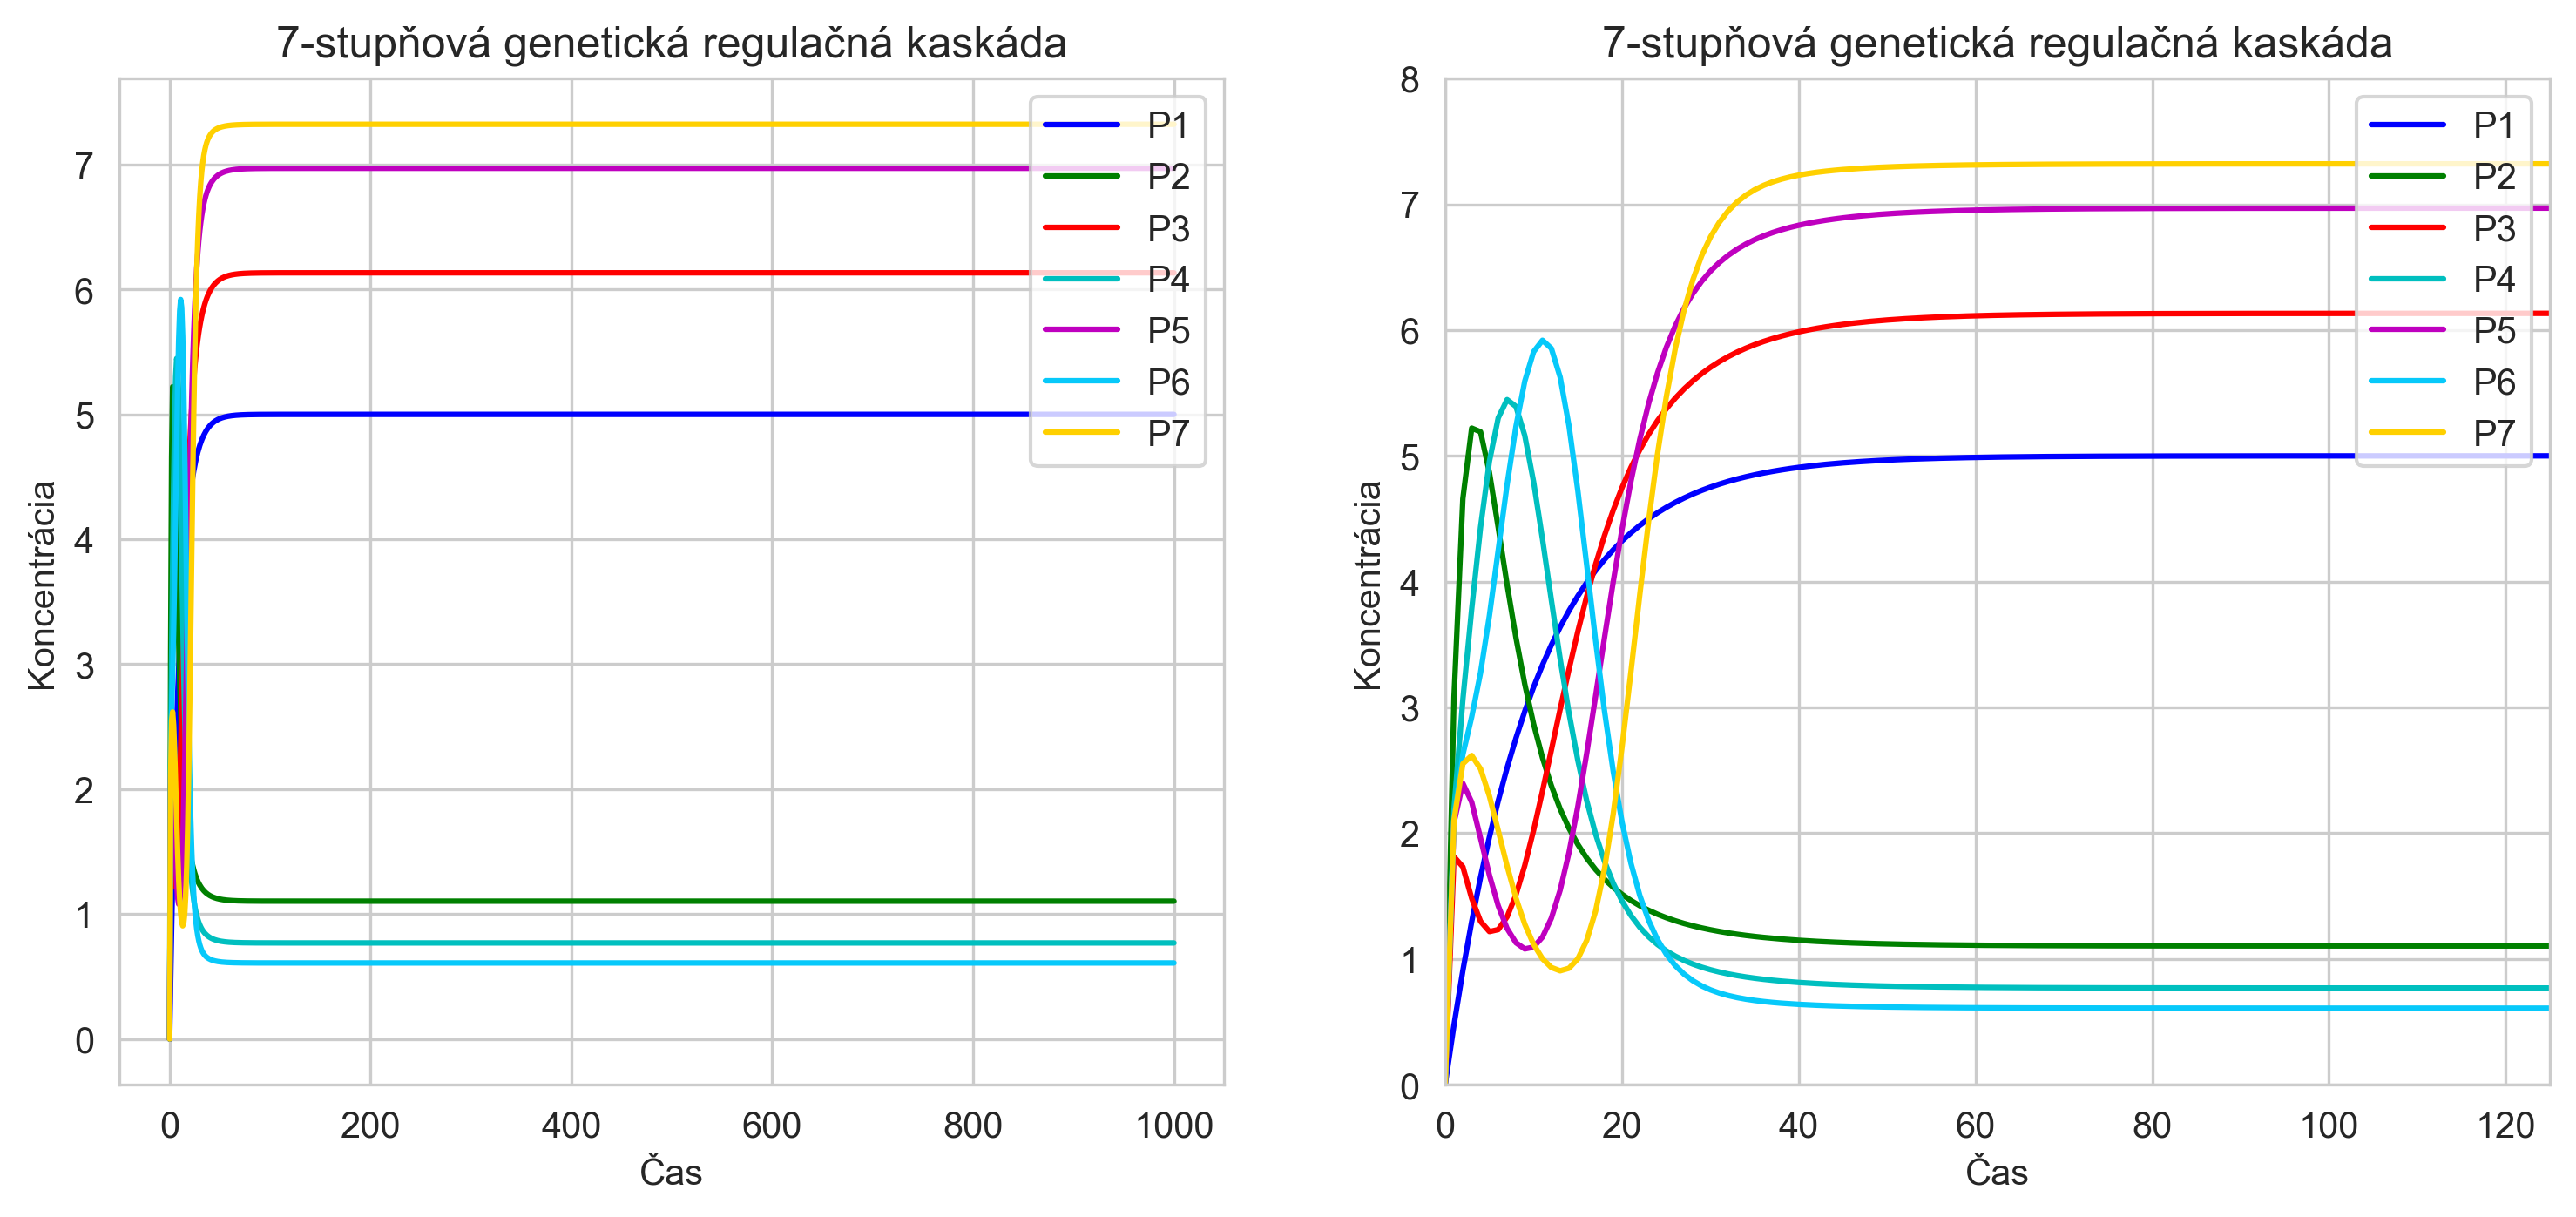

In [20]:
# PLOTTING THE SOLUTION

# Solution formatting
y = y.T

labels = ["P1", "P2", "P3", "P4", "P5", "P6", "P7"]
palette = ["b", "g", "r", "c", "m", "#07c9fa", "#ffd000"]
#palette = sns.color_palette("Paired", 13)

# PLOTTING THE SOLUTION

# Figure parameters
dpi = 300
fig = plt.figure(figsize=(12, 5), dpi=dpi)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

line__1, = ax1.plot(t, y[0], color=palette[0], label=labels[0])
line__2, = ax2.plot(t, y[0], color=palette[0], label=labels[0])
        
line_1 = [line__1]
line_2 = [line__2]

p = []
# Plotting lines
for i in range(1,7):
    p.append(y[i][-1])
    line__1, = ax1.plot(t, y[i], color=palette[i], label=labels[i])
    line__2, = ax2.plot(t, y[i], color=palette[i], label=labels[i])
    line_1.append(line__1)
    line_2.append(line__2)

ax1.set_ylabel('Koncentrácia')
ax1.set_xlabel('Čas')
ax1.set_title("7-stupňová genetická regulačná kaskáda")
ax1.legend(handles=line_1, loc="upper right")
ax1.grid(True)

ax2.set_ylabel('Koncentrácia')
ax2.set_xlabel('Čas')
ax2.set_title("7-stupňová genetická regulačná kaskáda")
ax2.set_xlim([0, 125])
ax2.set_ylim([0, 8])
ax2.legend(handles=line_2, loc="upper right")
ax2.grid(True)

plt.show()

In [27]:
class AnnotatedFunction:
    # A class representing a mathematical function.

    def __init__(self, func, latex_label):
        self.func = func
        self.latex_label = latex_label

    def __call__(self, *args, **kwargs):
        return self.func(*args, **kwargs)

def plot_cobweb(f, b_, Gamma_, k_max, k_d, n_, x0, nmax=100, n_arrows=5):

    x = np.linspace(0, 10, 1000)
    fig = plt.figure(figsize=(5, 5), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, b_, Gamma_, k_max, k_d, n_), c='#444444', lw=2)
    ax.plot(x, x, c='#444444', lw=2, linestyle='dashed')

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2, nmax+1, 1))
    px[0], py[0] = x0, 0
    for i in range(1, nmax, 2):
        px[i] = px[i-1]
        py[i] = f(px[i], b_, Gamma_, k_max, k_d, n_)
        px[i+1] = py[i]
        py[i+1] = py[i]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b')
    ax.set_ylim((0,10))
    ax.set_xlim((0,10))

    # Add arrows
    arrow_interval = 1  # Determines how frequently arrows are drawn
    for n in range(1, n_arrows, arrow_interval):
        # Calculate the start and end points of the arrow
        start_x = px[n - 1][0]
        start_y = py[n - 1][0]
        if n < n_arrows - 1:  # To avoid index out of range
            end_x = (px[n][0] - start_x)/2
            end_y = (py[n][0] - start_y)/2

            # Check for zero-length arrow to avoid plotting issues
            if end_x != 0 or end_y != 0:
                # Draw the arrow
                ax.arrow(start_x, start_y, end_x, end_y, head_width=0.02, head_length=0.03, fc='red', ec='red')

    # Annotate and tidy the plot.
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('$q^*_{i-1}$')
    ax.set_ylabel(f.latex_label)
    ax.set_title("cobweb")

    plt.show()

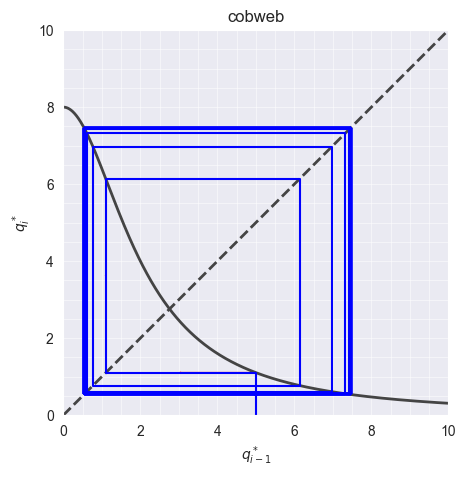

In [28]:
# check stable states
q = AnnotatedFunction(lambda x, b_, Gamma_, k_max, k_d, n_: b_/Gamma_ * h(x, k_max, k_d, n_), r'$q^*_i$')

plot_cobweb(q, b, Gamma, kmax, kd, n, 5)


In [34]:
p_stable_state = [b1*k1/Gamma1]

for i in range(1,100):
    q_i = b/Gamma * h(p_stable_state[i-1],kmax,kd,n)
    p_stable_state.append(q_i)
    
print("stable states")
print(p_stable_state[0:7])
print(p_stable_state[-2:])

stable states
[5.0, 1.103448275862069, 6.133090246125798, 0.7689572724393674, 6.969710724496325, 0.6086326833637751, 7.321927726134763]
[7.464101615137755, 0.5358983848622453]
